# Deep Neural Networks

In [ ]:
import tensorflow        as tf
import numpy             as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 1
%aimport nn_model
%aimport create_data
%aimport preprocess

## Define useful functions

In [ ]:
def plot_data(x, y, title):
    fig = plt.figure(figsize=(5,5))
    if x.shape[1] == 2:
        ax = plt.axes()
        ax.scatter(x[:,0], x[:,1], c=y)
    elif x.shape[1] == 3:
        ax = plt.axes(projection='3d')
        ax.scatter3D(x[:,0], x[:,1], x[:,2], c=y, alpha=0.3)
    ax.set_title(title)
    plt.show()

def network_perf(fit):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,6))

    ax[0].plot(fit.history['accuracy'],label="train")
    ax[0].plot(fit.history['val_accuracy'],label="valid.")
    ax[0].set_xlabel('epoch')
    ax[0].set_ylabel("Accuracy")

    ax[1].plot(fit.history['loss'],label="train")
    ax[1].plot(fit.history['val_loss'],label="valid.")
    ax[1].set_xlabel('epoch')
    ax[1].set_ylabel("Loss")
    ax[1].legend()

    plt.show()

def pred_comp(x, network):
    pred = network.predict(x)
    # if pred-label > 0.5 ==> pred-label==1
    pred_binary = pred.copy()
    pred_binary[pred <= 0.5] = 0
    pred_binary[pred >  0.5] = 1

    # plots
    if x.shape[1] == 2:
        fig, ax = plt.subplots(nrows=1, ncols=3,figsize=(16,5))
        # real data
        ax[0].scatter(x_scaled[:,0], x_scaled[:,1], c=y)
        # NN prediction
        ax[1].scatter(x_scaled[:,0], x_scaled[:,1], c=pred)
        # hard NN prediction
        ax[2].scatter(x_scaled[:,0], x_scaled[:,1], c=pred_binary)
    elif x.shape[1] == 3:
        fig = plt.figure(figsize=(16,5))
        ax = (fig.add_subplot(1, 3, 1, projection='3d'),
              fig.add_subplot(1, 3, 2, projection='3d'),
              fig.add_subplot(1, 3, 3, projection='3d'))
        ax[0].scatter3D(x_scaled[:,0], x_scaled[:,1], x_scaled[:,2], c=y, alpha=0.3)
        ax[1].scatter3D(x_scaled[:,0], x_scaled[:,1], x_scaled[:,2], c=pred, alpha=0.3)
        ax[2].scatter3D(x_scaled[:,0], x_scaled[:,1], x_scaled[:,2], c=pred_binary, alpha=0.3)
    
    ax[0].set_title("real data")
    ax[1].set_title("NN prediction")
    ax[2].set_title("hard NN prediction")
    plt.show()

def best_net(dim, name):
    # NN hyperparameters
    architecture      = [dim, 20, 20, 1]
    dropout_arc       = [1]
    dropout_rates     = [0.2]
    batch_norm_arc    = [2]   
    input_dim         = architecture[0]
    hidden_activation = "relu"
    output_activation = "sigmoid"

    # build the NN model
    network = nn_model.NN(
        input_dim         = input_dim,
        architecture      = architecture,
        dropout_layers    = dropout_arc,
        dropout_rates     = dropout_rates,
        batch_norm_layers = batch_norm_arc,
        hidden_activation = hidden_activation,
        output_activation = output_activation,
        nn_name           = name,
    )

    # print summary
    network.summary()

    # compile NN with loss, optimizer and metrics
    loss      = "binary_crossentropy"
    optimizer = "adam"
    metrics   = ["accuracy"]

    network.compile(
        loss      = loss,
        optimizer = optimizer,
        metrics   = metrics,
    )
    return network

## Trying different data
### 1) Circular data
#### 1.a) Generating

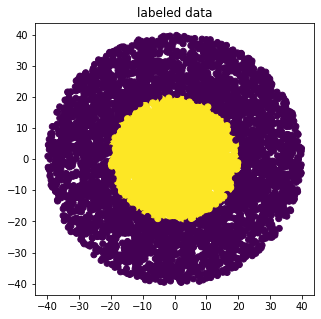

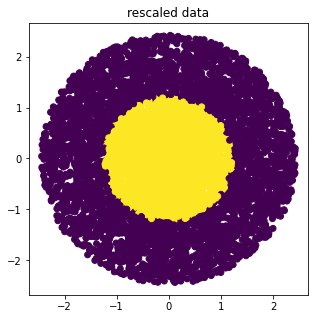

In [ ]:
# number of data
N = 8000
# box dim
B = 100

# random seed for reproducibility
np.random.seed(20220307)

x, y = create_data.create_data(N, B, c='rad')
# re-scaling data 
mean = np.mean(x, axis=0)
std = np.std(x, axis=0)
x_scaled = preprocess.standardize(x, mean, std)

plot_data(x,y,'labeled data')
plot_data(x_scaled,y,'rescaled data')


#### 1.b) Dividing

In [ ]:
train_frac = 0.8
valid_frac = 0.2

N_train = int(N*train_frac)
training_data, training_labels = np.copy(x_scaled[0:N_train]), np.copy(y[0:N_train])
test_data,     test_labels     = np.copy(x_scaled[N_train:]),  np.copy(y[N_train:])

print(f"Traing set :\t{training_data.shape[0]}\nTest set  :\t{test_data.shape[0]}")

N_valid = int(N_train*valid_frac)
x_train, y_train = np.copy(training_data[N_valid:]),  np.copy(training_labels[N_valid:])
x_valid, y_valid = np.copy(training_data[0:N_valid]), np.copy(training_labels[0:N_valid])

print(f"\nN_train :\t{x_train.shape[0]} \nN_valid :\t{x_valid.shape[0]}")

Traing set :	6400
Test set  :	1600

N_train :	5120 
N_valid :	1280


#### 1.c) Defining network structure

In [ ]:
first_net = best_net(x_scaled.shape[1], 'circular data neural network')

Model: "circular data neural network"
____________________________________________________________________________________________________
 Layer (type)                                Output Shape                            Param #        
 input_layer (InputLayer)                    [(None, 2)]                             0              
                                                                                                    
 hidden_0 (Dense)                            (None, 20)                              60             
                                                                                                    
 dropout_0 (Dropout)                         (None, 20)                              0              
                                                                                                    
 batch_norm_1 (BatchNormalization)           (None, 20)                              80             
                                                     

#### 1.d) Training

In [ ]:
minibatch = 100
N_epochs  = 300

first_fit = first_net.fit(
    x_train, y_train,
    epochs          = N_epochs,
    batch_size      = minibatch,
    validation_data = (x_valid, y_valid),
    verbose         = 0,
)

#### 1.e) Results

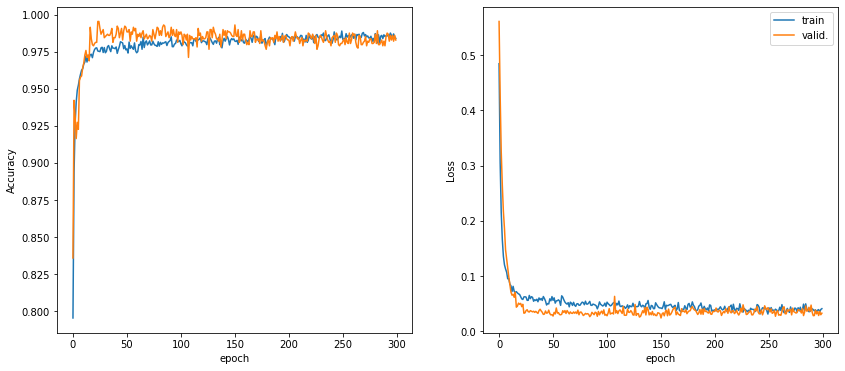

In [ ]:
network_perf(first_fit)

In [ ]:
test = first_net.evaluate(
    test_data, test_labels,
    batch_size      = minibatch,
    verbose         = 0,
)

print("test loss, test acc:", test)

test loss, test acc: [0.03095809370279312, 0.9868749976158142]


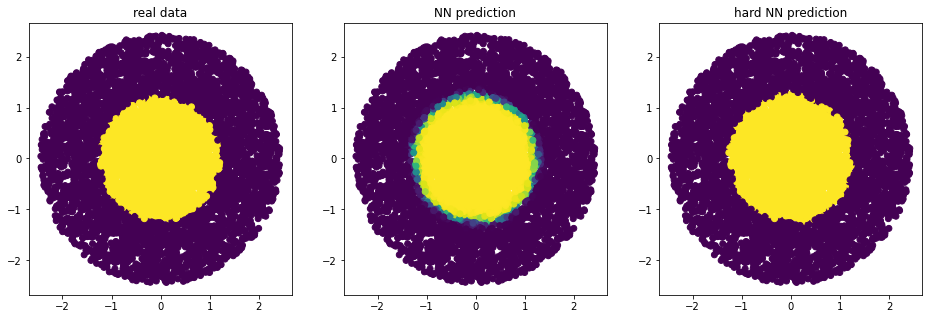

In [ ]:
pred_comp(x_scaled, first_net)

### 2) Non linear data
#### 2.a) Generating data


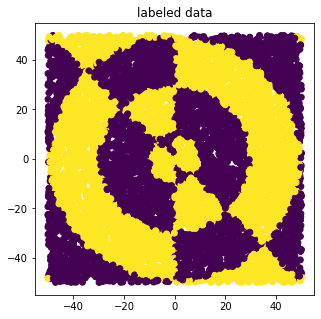

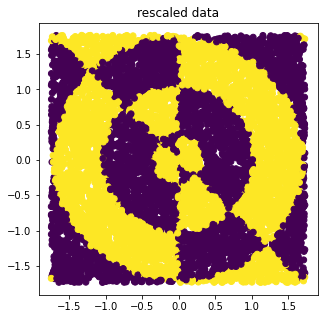

In [ ]:
# number of data
N = 8000
# box size
B = 100

x, y = create_data.create_data(N, B, c='weird')
# re-scaling data 
mean = np.mean(x, axis=0)
std = np.std(x, axis=0)
x_scaled = preprocess.standardize(x, mean, std)

plot_data(x,y,'labeled data')
plot_data(x_scaled,y,'rescaled data')


#### 2.b) Dividing

In [ ]:
train_frac = 0.8
valid_frac = 0.4

N_train = int(N*train_frac)
training_data, training_labels = np.copy(x_scaled[0:N_train]), np.copy(y[0:N_train])
test_data,     test_labels     = np.copy(x_scaled[N_train:]),  np.copy(y[N_train:])

print(f"Traing set :\t{training_data.shape[0]}\nTest set  :\t{test_data.shape[0]}")

N_valid = int(N_train*valid_frac)
x_train, y_train = np.copy(training_data[N_valid:]),  np.copy(training_labels[N_valid:])
x_valid, y_valid = np.copy(training_data[0:N_valid]), np.copy(training_labels[0:N_valid])

print(f"\nN_train :\t{x_train.shape[0]} \nN_valid :\t{x_valid.shape[0]}")

Traing set :	6400
Test set  :	1600

N_train :	3840 
N_valid :	2560


#### 2.c) Defining DNN structure

In [ ]:
second_net = best_net(x_scaled.shape[1], 'weird data neural network')

Model: "weird data neural network"
____________________________________________________________________________________________________
 Layer (type)                                Output Shape                            Param #        
 input_layer (InputLayer)                    [(None, 2)]                             0              
                                                                                                    
 hidden_0 (Dense)                            (None, 20)                              60             
                                                                                                    
 dropout_0 (Dropout)                         (None, 20)                              0              
                                                                                                    
 batch_norm_1 (BatchNormalization)           (None, 20)                              80             
                                                        

#### 2.d) Training

In [ ]:
minibatch = 100
N_epochs  = 300

second_fit = second_net.fit(
    x_train, y_train,
    epochs          = N_epochs,
    batch_size      = minibatch,
    validation_data = (x_valid, y_valid),
    verbose         = 0,
)

#### 2.e) Results

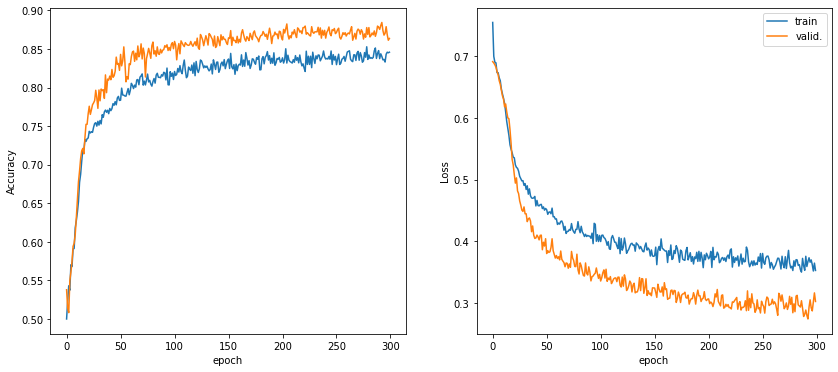

In [ ]:
network_perf(second_fit)

In [ ]:
test = second_net.evaluate(
    test_data, test_labels,
    batch_size      = minibatch,
    verbose         = 0,
)

print("test loss, test acc:", test)

test loss, test acc: [0.3251090943813324, 0.8531249761581421]


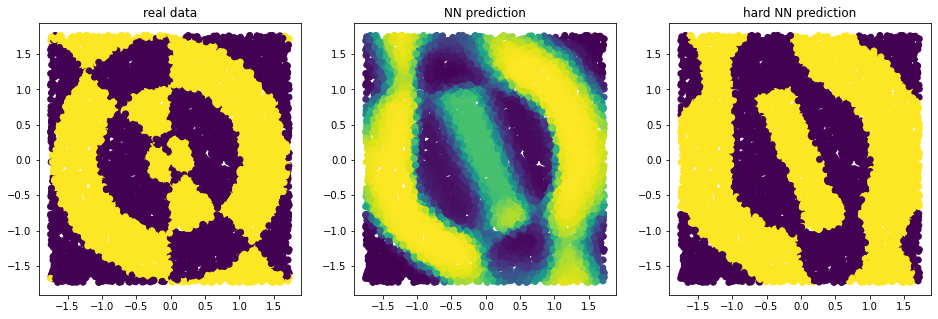

In [ ]:
pred_comp(x_scaled, second_net)

### 3) Now in 3D!
#### 3.a) Generating data

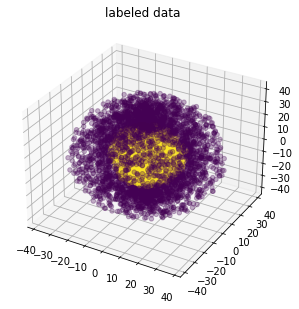

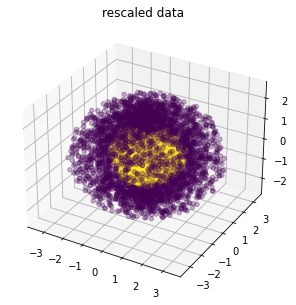

In [ ]:
# number of data
N = 8000
# box size
B = 100

x, y = create_data.create_data(N, B, c='rad3d')
# re-scaling data 
mean = np.mean(x, axis=0)
std = np.std(x, axis=0)
x_scaled = preprocess.standardize(x, mean, std)

plot_data(x,y,'labeled data')
plot_data(x_scaled,y,'rescaled data')

#### 3.b) Dividing

In [ ]:
train_frac = 0.8
valid_frac = 0.4

N_train = int(N*train_frac)
training_data, training_labels = np.copy(x_scaled[0:N_train]), np.copy(y[0:N_train])
test_data,     test_labels     = np.copy(x_scaled[N_train:]),  np.copy(y[N_train:])

print(f"Traing set :\t{training_data.shape[0]}\nTest set  :\t{test_data.shape[0]}")

N_valid = int(N_train*valid_frac)
x_train, y_train = np.copy(training_data[N_valid:]),  np.copy(training_labels[N_valid:])
x_valid, y_valid = np.copy(training_data[0:N_valid]), np.copy(training_labels[0:N_valid])

print(f"\nN_train :\t{x_train.shape[0]} \nN_valid :\t{x_valid.shape[0]}")

Traing set :	6400
Test set  :	1600

N_train :	3840 
N_valid :	2560


#### 3.c) Defining DNN structure

In [ ]:
third_net = best_net(x_scaled.shape[1], '3d data neural network')

Model: "3d data neural network"
____________________________________________________________________________________________________
 Layer (type)                                Output Shape                            Param #        
 input_layer (InputLayer)                    [(None, 3)]                             0              
                                                                                                    
 hidden_0 (Dense)                            (None, 20)                              80             
                                                                                                    
 dropout_0 (Dropout)                         (None, 20)                              0              
                                                                                                    
 batch_norm_1 (BatchNormalization)           (None, 20)                              80             
                                                           

#### 3.d) Training

In [ ]:
minibatch = 100
N_epochs  = 300

third_fit = third_net.fit(
    x_train, y_train,
    epochs          = N_epochs,
    batch_size      = minibatch,
    validation_data = (x_valid, y_valid),
    verbose         = 0,
)

#### 3.e) Results

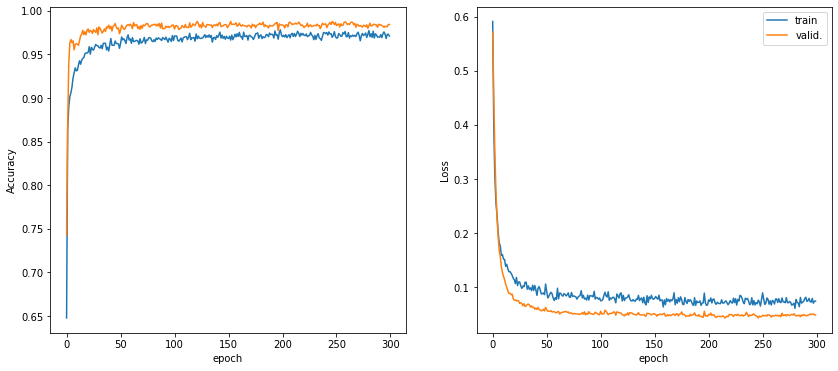

In [ ]:
network_perf(third_fit)

In [ ]:
test = third_net.evaluate(
    test_data, test_labels,
    batch_size      = minibatch,
    verbose         = 0,
)

print("test loss, test acc:", test)

test loss, test acc: [0.04613440856337547, 0.9831249713897705]


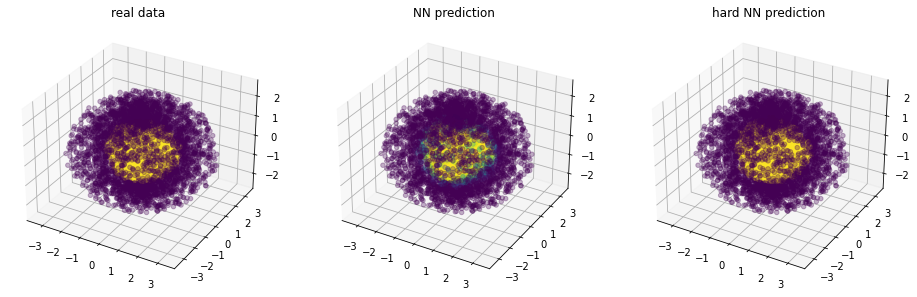

In [ ]:
pred_comp(x_scaled, third_net)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=452e6836-b7b8-455e-80d9-d4109b6baddf' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>